# Hierarchical clustering

The data used here comes from Kaggle: https://archive.ics.uci.edu/ml/datasets/wine

It includes 13 characteristics of wine. To simplify the analysis, I will use the 6 variables that better differentiated different clusters in the K-means clustering analysis performed in a previous tutorial.


## Exploring Data

In [145]:
# import necessary libraries

import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

path = 'C:/Users/Katia/Documents/Machine learning'
os.chdir(path)

In [146]:
# read csv data 

# Check README for where you can find the data
df_or = pd.read_csv('wine_clustering_data1.csv', sep=';')

In [147]:
# Check dataset
df = df_or.drop(['Clusters'], axis = 1)
df= df_or[['Alcohol', 'Malicacid', 'Flavanoids', 'Nonflavanoidphenols', 'Proanthocyanins','Colorintensity']]

df.head()

,Alcohol,Malicacid,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity
0,14.23,1.71,3.06,0.28,2.29,5.64
1,13.20,1.78,2.76,0.26,1.28,4.38
2,13.16,2.36,3.24,0.30,2.81,5.68
3,14.37,1.95,3.49,0.24,2.18,7.80
4,13.24,2.59,2.69,0.39,1.82,4.32


In [148]:
df.shape

(178, 6)

In [149]:
# Check descriptive statistics of continuous variables
df.describe()

,Alcohol,Malicacid,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity
count,178.000000,178.000000,178.000000,178.000000,178.000000,1.780000e+02
mean,13.000618,2.336348,2.029270,0.361854,1.590899,5.562297e+04
std,0.811827,1.117146,0.998859,0.124453,0.572359,7.420359e+05
min,11.030000,0.740000,0.340000,0.130000,0.410000,1.280000e+00
25%,12.362500,1.602500,1.205000,0.270000,1.250000,3.220000e+00
50%,13.050000,1.865000,2.135000,0.340000,1.555000,4.690000e+00
75%,13.677500,3.082500,2.875000,0.437500,1.950000,6.200000e+00
max,14.830000,5.800000,5.080000,0.660000,3.580000,9.899999e+06


In [150]:
# Check if there are any missing values
df.isnull().sum()

Alcohol                0
Malicacid              0
Flavanoids             0
Nonflavanoidphenols    0
Proanthocyanins        0
Colorintensity         0
dtype: int64

### Explore distributions

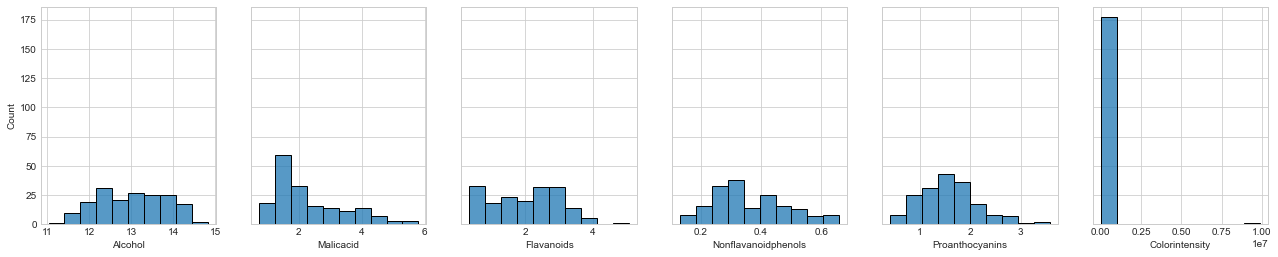

In [151]:
# Exploring distributions with histograms

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1, 6, sharey=True, figsize = (22,4))

number = 1
for column in df: 
    ax_val = 'ax' + str(number)
    sns.histplot(df[column], bins =10, ax = eval(ax_val))
    number += 1

## Remove outliers

In [152]:
def outlier(feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std =np.std(data)
    
    for value in data:
        z_score= (value - mean)/std 
        if np.abs(z_score) > 3:
            outliers.append(value)
    print('\nOutlier caps for {}:'.format(feature))
    print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
                                                             len([i for i in data
                                                                  if i > data.quantile(.95)])))
    print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
                                                           len([i for i in data
                                                                if i > data.quantile(.99)])))
    
# function from https://www.linkedin.com/learning/applied-machine-learning-feature-engineering

In [153]:
for variable in df:
    outlier(variable)


Outlier caps for Alcohol:
  --95p: 14.2 / 9 values exceed that
  --3sd: 15.4 / 0 values exceed that
  --99p: 14.5 / 2 values exceed that

Outlier caps for Malicacid:
  --95p: 4.5 / 9 values exceed that
  --3sd: 5.7 / 1 values exceed that
  --99p: 5.5 / 2 values exceed that

Outlier caps for Flavanoids:
  --95p: 3.5 / 9 values exceed that
  --3sd: 5.0 / 1 values exceed that
  --99p: 3.8 / 2 values exceed that

Outlier caps for Nonflavanoidphenols:
  --95p: 0.6 / 8 values exceed that
  --3sd: 0.7 / 0 values exceed that
  --99p: 0.6 / 1 values exceed that

Outlier caps for Proanthocyanins:
  --95p: 2.7 / 9 values exceed that
  --3sd: 3.3 / 1 values exceed that
  --99p: 3.0 / 2 values exceed that

Outlier caps for Colorintensity:
  --95p: 9.6 / 9 values exceed that
  --3sd: 2275468.8 / 1 values exceed that
  --99p: 12.0 / 2 values exceed that


In [154]:
# Remove outliers based on 99 quantile
for column in df:
    df[column].clip(upper=df[column].quantile(.99), inplace = True)

C:\Users\katia\Anaconda3\lib\site-packages\pandas\core\generic.py:7352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._clip_with_scalar(lower, upper, inplace=inplace)


In [155]:
df.describe()

,Alcohol,Malicacid,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,12.997054,2.334294,2.021252,0.361685,1.586445,5.064691
std,0.804575,1.111002,0.979667,0.124067,0.559125,2.331528
min,11.030000,0.740000,0.340000,0.130000,0.410000,1.280000
25%,12.362500,1.602500,1.205000,0.270000,1.250000,3.220000
50%,13.050000,1.865000,2.135000,0.340000,1.555000,4.690000
75%,13.677500,3.082500,2.875000,0.437500,1.950000,6.200000
max,14.472800,5.542200,3.791400,0.630000,3.033600,12.037500


## Check for multicollinearity

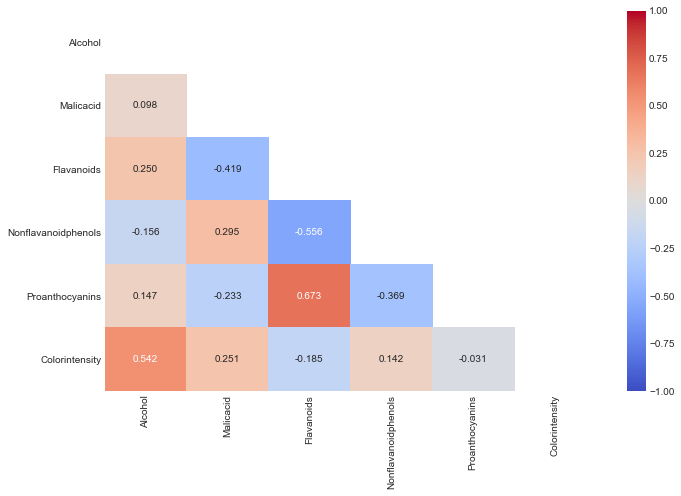

In [156]:
# Generate correlation matrix heat map (only useful for continuous variables)
plt.figure(figsize = (11, 7))

matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, fmt='.3f', vmin=-1, 
            vmax=1, center= 0, cmap='coolwarm', mask=matrix)

If a threshold is set at .7, no variables need to be removed.

## Scale variables

In [157]:
from sklearn.preprocessing import scale

#Scalling the data
X = df
X = scale(X)
y = pd.DataFrame(df_or.Clusters)
X[0:10]

array([[ 1.5367, -0.5635,  1.0633, -0.6603,  1.2619,  0.2474],
       [ 0.253 , -0.5003,  0.7562, -0.8219, -0.5496, -0.2945],
       [ 0.2031,  0.0232,  1.2476, -0.4986,  2.1945,  0.2647],
       [ 1.7112, -0.3469,  1.5035, -0.9836,  1.0646,  1.1765],
       [ 0.3028,  0.2308,  0.6846,  0.2289,  0.4189, -0.3203],
       [ 1.4993, -0.5184,  1.4011, -0.1753,  0.6879,  0.7249],
       [ 1.7362, -0.4191,  0.5105, -0.4986,  0.7059,  0.0797],
       [ 1.3249, -0.1663,  0.5003, -0.4178, -0.6034, -0.0063],
       [ 1.8394, -0.6267,  0.9814, -0.5794,  0.7059,  0.0582],
       [ 1.0756, -0.8885,  1.1554, -1.1452,  0.4727,  0.927 ]])

## Building the model

In [158]:
# import packages
import sklearn
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering

import scipy
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [159]:
# Run the model
# Z is the clustering result from the algorithm

Z = linkage(X, 'ward')

A dendogram shows how many clusters are recommended for the model. The number of clusters below the mid point of the longest branch (y axis) is recommended.

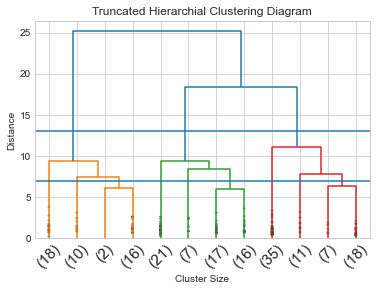

In [160]:
# Generate a dendogram

dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15, show_contracted=True)

plt.title('Truncated Hierarchial Clustering Diagram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')

# Set up midpoint based on your data
plt.axhline(y=13)
plt.axhline(y=7)
plt.show()

According to the dendogram, 3 clusters seems to be the best.

## Evaluate model

Once the number of clusters are defined, we should test different parameters. There are three distance parameteres (i.e., Euclidean, Manhattan, and Cosine) and three linkage parameteres (i.e., Ward, Complete, and Average). The accuracy of the models should be calculated to judge which parameteres are the best. PS: "Ward" only works with "Euclidean."

In [161]:
k=3

Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.33707865168539325

In [162]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.1348314606741573

In [163]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.011235955056179775

In [164]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='manhattan', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.28651685393258425

In [165]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='complete')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.2640449438202247

In [166]:
Hclustering = AgglomerativeClustering(n_clusters=k, affinity='cosine', linkage='average')
Hclustering.fit(X)

sm.accuracy_score(y, Hclustering.labels_)

0.3202247191011236

The "euclidean" and "ward" parameters generate the model with the best accuracy. In general, though, accuracy is not high, suggesting that hierarchical clustering might not be ideal for these data.